## Time Series Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


Visualisasi data selama rentang beberapa tahun

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.to_period('Y')
tahun = df.groupby('Year').sum().reset_index()
tahun['Year'] = tahun['Year'].astype(str)
tahun

<ipython-input-6-cc2cec6aa5e6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tahun = df.groupby('Year').sum().reset_index()


,Year,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020,1494046,45131,1234857,214058,121956025,4464047,94092281,23399697,0.0,...,7664041.40,1.138448e+06,-27472.946344,108998.10,8.895265e+06,2700.08,259675.00,25966.70,13389.89,8885.57
1,2021,7031323,243099,6993549,-205325,1976355995,61392893,1809923761,105039341,0.0,...,9285607.30,1.452885e+06,-34721.662641,531697.88,1.444596e+08,15886.63,3845875.23,384587.62,16341.34,12712.64
2,2022,4276984,27465,4194855,54664,2975705807,79402637,2845782204,50520966,0.0,...,6563465.69,1.026843e+06,-24541.997987,254561.63,2.121221e+08,1789.18,5111171.46,511116.72,9917.39,7736.84


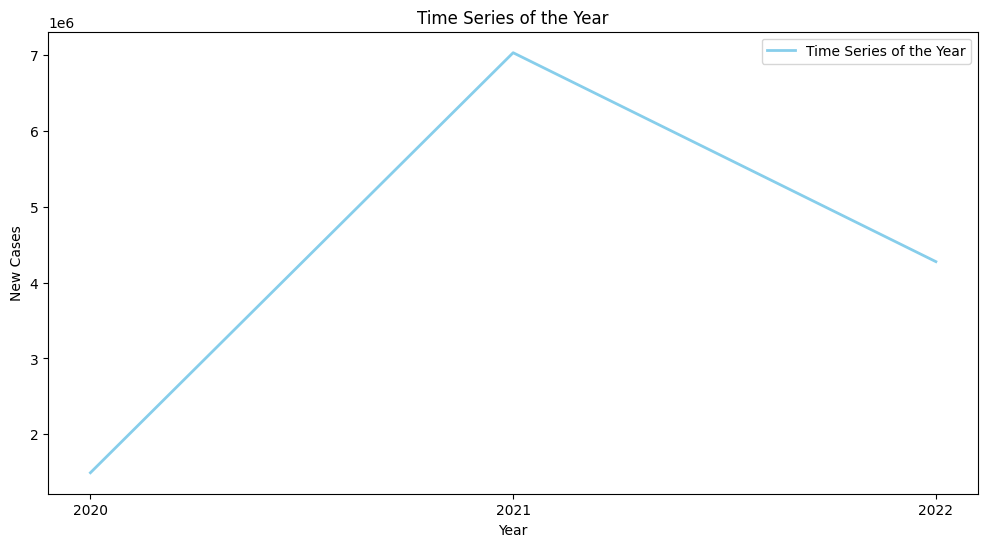

In [7]:
plt.figure(figsize=(12,6))
plt.plot(tahun['Year'],tahun['New Cases'], color='skyblue', linewidth=2, label='Time Series of the Year')
plt.xlabel('Year')
plt.ylabel('New Cases')
plt.legend()
plt.title('Time Series of the Year')
plt.show()

Pengelompokan (grouping) data time series berdasarkan bulan

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
bulan = df.groupby('Month').sum().reset_index()
bulan['Month'] = bulan['Month'].astype(str)
bulan

<ipython-input-8-b6e4cfb3648e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bulan = df.groupby('Month').sum().reset_index()


,Month,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03,2548,322,272,1954,19343,3859,15047,437,0.0,...,669868.38,45882.629642,-1376.064177,100.02,673.77,17.06,226.91,22.64,398.64,327.64
1,2020-04,17248,1345,3440,12463,317410,33619,70558,213233,0.0,...,761368.12,117341.108290,-2790.560669,1215.61,18660.13,62.03,1774.38,177.25,1053.33,913.39
2,2020-05,33546,1707,12641,19198,1098809,78599,305361,714849,0.0,...,788640.62,123395.738680,-2948.963128,2407.53,75311.96,103.82,4051.95,405.01,1496.52,915.80
3,2020-06,60649,2824,36687,21138,2447419,144276,1024621,1278522,0.0,...,763200.60,119415.230981,-2853.835286,4437.60,175180.22,169.49,8157.02,815.71,1256.59,923.95
4,2020-07,105594,4604,79387,21603,5154637,263064,2743644,2147929,0.0,...,788640.62,123395.738680,-2948.963128,7685.48,366456.46,231.58,14594.76,1459.29,1416.81,904.92
5,2020-08,133379,4744,119734,8901,8772841,406355,5893656,2472830,0.0,...,788640.62,123395.738680,-2948.963128,9837.16,640415.21,269.33,22171.61,2216.78,1663.25,971.29
6,2020-09,224976,6524,177257,41195,13866129,566090,9989428,3310611,0.0,...,763200.60,119415.230981,-2853.835286,16593.69,1006560.49,391.42,31561.14,3156.23,1438.10,945.94
7,2020-10,247294,6473,253361,-12540,22007824,786955,17194929,4025940,0.0,...,788640.62,123395.738680,-2948.963128,18718.28,1619663.57,465.24,45394.33,4539.64,1396.68,1076.67
8,2020-11,258517,6421,227856,24240,28411922,948426,23933189,3530307,0.0,...,763200.60,119415.230981,-2853.835286,17991.15,2083561.89,414.63,57371.42,5737.07,1631.70,912.06
9,2020-12,410295,10167,324222,75906,39859691,1232804,32921848,5705039,0.0,...,788640.62,123395.738680,-2948.963128,30011.58,2908781.37,575.48,74371.48,7437.08,1638.27,993.91


Pengelompokan (grouping) data time series berdasarkan hari

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Daily'] = df['Date'].dt.to_period('D')
harian = df.groupby('Daily').sum().reset_index()
harian['Daily'] = harian['Daily'].astype(str)
harian

<ipython-input-9-793e7b9205df>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  harian = df.groupby('Daily').sum().reset_index()


,Daily,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,2,0,0,2,39,20,75,-56,0.0,...,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,0.00,0.00
1,2020-03-02,5,0,0,5,44,20,76,-52,0.0,...,16542.45,322.562555,-6.482326,0.35,3.95,0.00,1.84,0.18,1.00,1.00
2,2020-03-03,3,1,0,2,47,21,136,-110,0.0,...,17819.00,430.166263,-13.402758,0.20,4.15,0.02,1.86,0.18,1.00,3.00
3,2020-03-04,3,0,0,3,50,21,136,-107,0.0,...,17819.00,430.166263,-13.402758,0.20,4.36,0.00,1.86,0.18,4.00,3.00
4,2020-03-05,1,1,0,0,51,22,136,-107,0.0,...,17819.00,430.166263,-13.402758,0.02,4.39,0.09,1.96,0.19,3.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,2022-09-12,1995,30,6991,-5026,12786964,315669,12408267,63028,0.0,...,25440.02,3980.507699,-95.127843,20.79,894765.12,1.34,20383.66,2038.36,8.88,31.14
926,2022-09-13,3087,24,4209,-1146,12790051,315693,12412476,61882,0.0,...,25440.02,3980.507699,-95.127843,30.72,894795.81,0.78,20384.44,2038.43,49.39,29.43
927,2022-09-14,4699,27,4301,371,12794750,315720,12416777,62253,0.0,...,25440.02,3980.507699,-95.127843,194.02,894989.85,0.29,20384.74,2038.46,159.98,32.05
928,2022-09-15,5293,22,4159,1112,12770491,314861,12392302,63328,0.0,...,25242.21,3738.786622,-93.353099,265.25,873438.00,0.32,19720.01,1971.97,100.15,29.00


Visualisasi bersama rata-rata mingguan kasus COVID-19 dan
harian

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Weekly'] = df['Date'].dt.to_period('W')
mingguan = df.groupby('Weekly').mean().reset_index()
mingguan['Weekly'] = mingguan['Weekly'].astype(str)
mingguan

<ipython-input-10-05d79c54dd7a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mingguan = df.groupby('Weekly').mean().reset_index()


,Weekly,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-02-24/2020-03-01,2.000000,0.000000,0.000000,2.000000,39.000000,20.000000,75.000000,-56.000000,NaN,...,16334.310000,106.836118,-6.204699,0.180000,3.600000,0.000000,1.840000,0.180000,NaN,NaN
1,2020-03-02/2020-03-08,0.645161,0.161290,0.129032,0.354839,11.645161,5.774194,39.967742,-34.096774,NaN,...,4125.613226,107.486718,-3.662199,0.032903,0.984194,0.010323,0.498065,0.049032,0.739130,0.875000
2,2020-03-09/2020-03-15,2.672727,0.309091,0.854545,1.509091,15.545455,6.000000,36.672727,-27.127273,NaN,...,2625.064182,110.297309,-4.645780,0.080364,0.796182,0.020364,0.437273,0.043455,1.070000,0.851778
3,2020-03-16/2020-03-22,5.680851,0.829787,0.617021,4.234043,35.329787,8.680851,44.521277,-17.872340,NaN,...,1719.401702,110.875080,-3.904787,0.108191,1.095213,0.032447,0.473191,0.046915,0.964512,0.913947
4,2020-03-23/2020-03-29,8.212121,0.975758,0.775758,6.460606,59.387879,10.648485,34.284848,14.454545,NaN,...,1027.719879,113.344631,-2.858417,0.337576,1.812727,0.044364,0.587939,0.058727,1.426304,1.045563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2022-08-15/2022-08-21,267.620408,1.236735,287.693878,-21.310204,360093.032653,8992.330612,348127.791837,2972.910204,NaN,...,726.857714,113.728791,-2.717938,12.650776,25317.351102,0.098531,580.343878,58.034694,1.303160,0.914306
130,2022-08-22/2022-08-28,251.008163,1.012245,281.938776,-31.942857,361912.391837,9000.179592,350172.779592,2739.432653,NaN,...,726.857714,113.728791,-2.717938,11.950776,25403.299102,0.085020,580.946612,58.094531,1.180901,0.879860
131,2022-08-29/2022-09-04,214.175510,1.195918,250.518367,-37.538776,363542.212245,9007.714286,352017.710204,2516.787755,NaN,...,726.857714,113.728791,-2.717938,10.007429,25479.470449,0.087224,581.525020,58.152286,1.194496,0.906157
132,2022-09-05/2022-09-11,162.857143,1.012245,226.461224,-64.616327,364828.159184,9015.657143,353703.473469,2109.028571,NaN,...,726.857714,113.728791,-2.717938,7.980490,25541.768082,0.082122,582.126898,58.212204,1.124739,0.898676


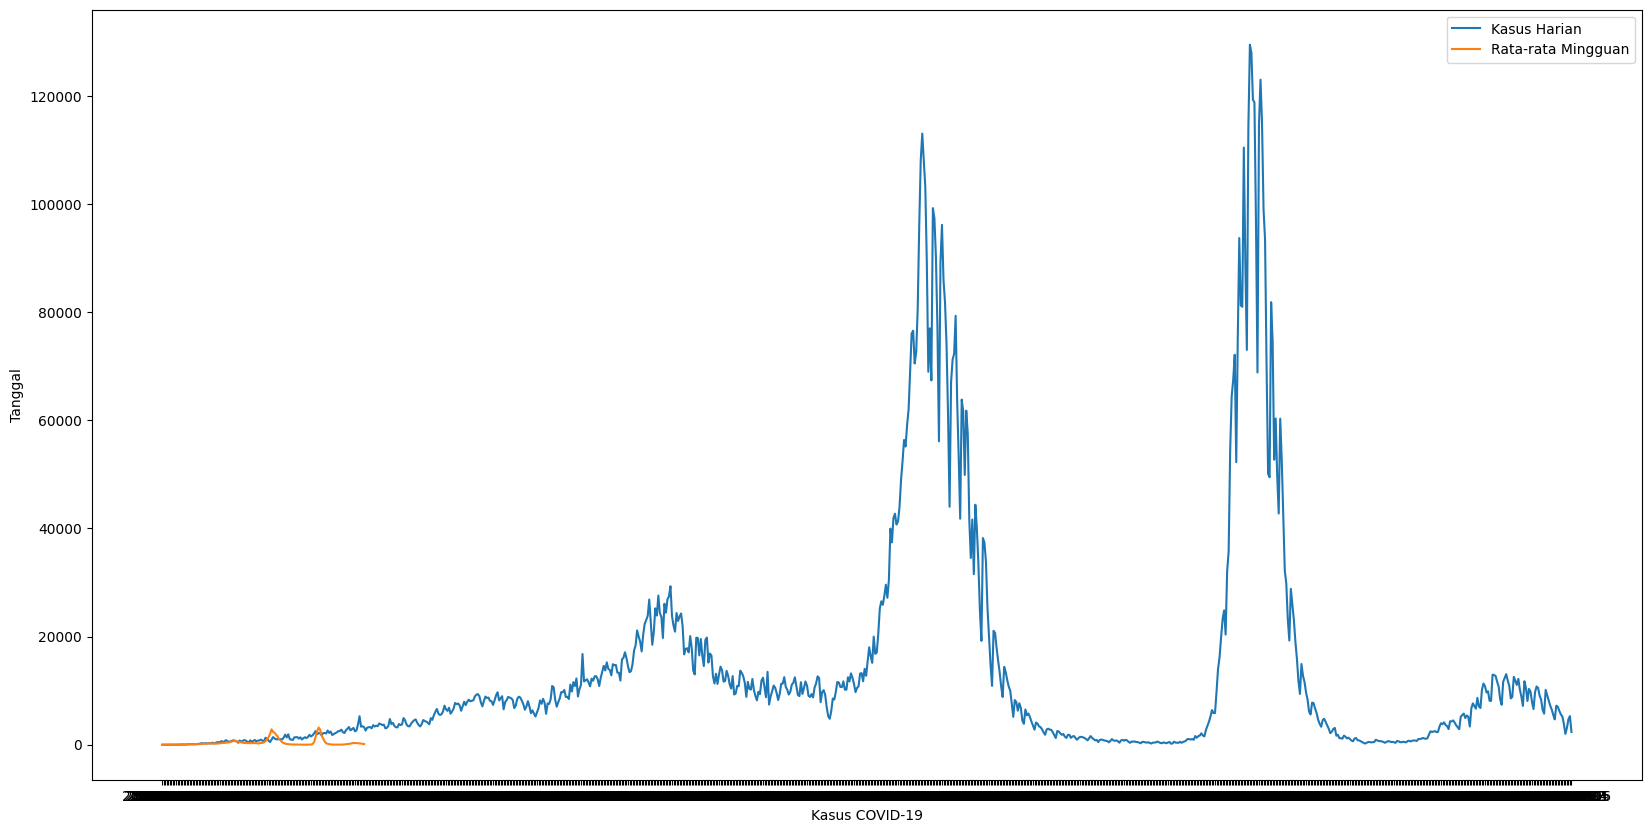

In [11]:
plt.figure(figsize=(20,10))
plt.plot(harian['Daily'],harian['New Cases'], label='Kasus Harian')
plt.plot(mingguan['New Cases'], label='Rata-rata Mingguan')
plt.xlabel('Kasus COVID-19')
plt.ylabel('Tanggal')
plt.legend()
plt.show()

## Hypothesis Testing

- Gunakan T-test dan H0 = rata-rata dari kasus harian COVID-19,
H1 = lebih dari (>) rata-rata dari kasus harian COVID-19
- Simpulkan apakah H0 diterima/ditolak
- Gunakan library Scipy menggunakan modul ttest_1samp

In [12]:
from scipy.stats import ttest_1samp

mean_harian = harian['New Cases'].mean()
print('Rata-rata dari kasus harian sebesar', mean_harian)
t_stat, p_value = ttest_1samp(harian['New Cases'], mean_harian)
print('t_stat:', t_stat)
print('p_value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('H0 ditolak, ini menunjukkan bahwa rata-rata dari kasus harian COVID-19 bernilai lebih dari', mean_harian)
else:
    print('H0 diterima, ini menunjukkan bahwa rata-rata dari kasus harian COVID-19 bernilai sama dengan', mean_harian)

Rata-rata dari kasus harian sebesar 13765.970967741936
t_stat: 0.0
p_value: 1.0
H0 diterima, ini menunjukkan bahwa rata-rata dari kasus harian COVID-19 bernilai sama dengan 13765.970967741936


## Analisis Korelasi

In [13]:
x = df['New Cases']
y = df['New Deaths']
n = len(x)
xy = np.sum(x * y)
sumx = np.sum(x)
sumy = np.sum(y)
x2 = np.sum(x**2)
y2 = np.sum(y**2)
corr = (n * xy - sumx * sumy) / (np.sqrt(n * x2 - sumx*2) * np.sqrt(n * y2 - sumy*2))
print('Koefisien korelasinya sebesar', corr)

Koefisien korelasinya sebesar 0.6969913165980919


## Regresi dan evaluasi

Cari model regresi yang tepat untuk menyelesaikan data harian
COVID-19 di Indonesia

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = df['New Cases']
y = df['New Deaths']

def slope_intercept(x, y):
    n = len(x)
    sumx = np.sum(x)
    sumy = np.sum(y)
    xy = np.sum(x * y)
    x2 = np.sum(x**2)
    a = ((n * xy) - (sumx * sumy)) / ((n * x2) - sumx**2)
    b = ((n * sumy) - (sumx * xy)) / ((n * x2) - sumx**2)
    y_pred = a * x + b
    print('sumx:', sumx)
    print('sumy:', sumy)
    print('xy:', xy)
    print('x2:', x2)
    print('a =', a)
    print('b =', b)
    print('Prediction:', y_pred)


slope_intercept(x,y)

sumx: 12802353
sumy: 315695
xy: 3517276538
x2: 176516890683
a = 0.01978374797955183
b = -8.257397226429394
Prediction: 0        -8.217830
1        -8.217830
2        -8.217830
3        -8.237613
4        -8.217830
           ...    
31817    -7.525399
31818    -8.000209
31819    -7.940857
31820    -7.268210
31821    38.392681
Name: New Cases, Length: 31822, dtype: float64


In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

x = df['New Cases'].values.reshape(-1, 1)
y = df['New Deaths'].values
regressor = LinearRegression()
regressor.fit(x, y)
intercept = regressor.intercept_
slope = regressor.coef_[0]

print('Intercept', intercept)
print('Slope',slope)

Intercept 1.961425262483214
Slope 0.01978374797955182


In [16]:
y_pred = regressor.predict(x)
print(y_pred)

[ 2.00099276  2.00099276  2.00099276 ...  2.27796523  2.95061266
 48.611503  ]


Evaluasi model regresi menggunakan MAPE

In [18]:
import numpy as np

y = df['New Deaths']
y_pred = np.array([y_pred])

def mape(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    return mape

mape_result = mape(y, y_pred)
print("MAPE:", mape_result)

MAPE: inf


<ipython-input-18-914ccfddb097>:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y - y_pred) / y)) * 100
